# **Samuel Vasco Gonzalez.** CC 1152223665

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tabulate import tabulate

# Here we import the data set using Tensorflow.datasets and we divide the data set in training and test.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Now we flatten the samples from arrays 3D into arrays 2D, where each sample is conformed for an array that contain all the pixels that conform the image.     

In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [4]:
print(" X_train Shape: ",X_train.shape,"\n","y_train Shape: ",y_train.shape,"\n",
      "X_test Shape: ",X_test.shape,"\n","y_test Shape: ",y_test.shape)

 X_train Shape:  (60000, 784) 
 y_train Shape:  (60000,) 
 X_test Shape:  (10000, 784) 
 y_test Shape:  (10000,)


# Here we show a few samples of data set.

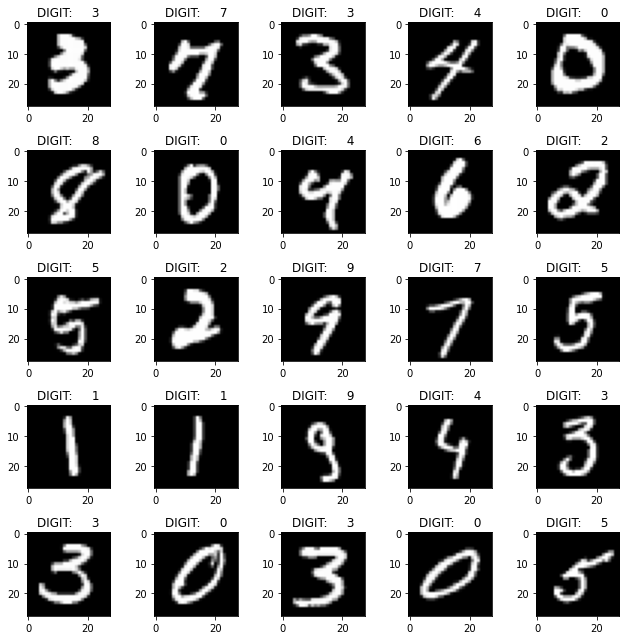

In [5]:
fig, axs = plt.subplots(5, 5,figsize=(9, 9))

for i in range(5):
  for j in range(5):
    random = np.random.randint(len(y_train)) #random integer number generation
    row_pixels=X_train[random] #pixels of the image 
    axs[i, j].imshow(row_pixels.reshape(28,28),cmap = "gray") #plot the digit randomly
    axs[i, j].set_title('DIGIT: {0:5d}'.format(y_train[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image

# **First Neural Network Model Classifier**

# First we create an architecture of a sequential model. Here we create the model layer-by-layer.

In [6]:
tf.random.set_seed(123)

#Model
#===============================================================================
model = Sequential([
                    InputLayer(input_shape=X_train[0].shape),
                    Dense(units=100, activation='relu', name='Layer_1'),
                    Dense(units=10, activation='softmax', name='Output_layer')
])


# Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 100)               78500     
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# Optimizer and Compile the model

In [8]:
opt = Adam(learning_rate=0.0009, 
            beta_1=0.76, 
            beta_2=0.999, 
            epsilon=1e-8, 
            amsgrad=False,
            name='Adam')
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the model

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 2.7686 - accuracy: 0.8272 - val_loss: 0.4821 - val_accuracy: 0.8877
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4532 - accuracy: 0.8936 - val_loss: 0.3085 - val_accuracy: 0.9225
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3221 - accuracy: 0.9177 - val_loss: 0.2426 - val_accuracy: 0.9415
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2686 - accuracy: 0.9289 - val_loss: 0.1995 - val_accuracy: 0.9432
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2421 - accuracy: 0.9349 - val_loss: 0.1992 - val_accuracy: 0.9492
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2220 - accuracy: 0.9418 - val_loss: 0.2354 - val_accuracy: 0.9433
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2089 - accuracy: 0.9453 - val_loss: 0.1801 - val_accurac

# Evaluating the model

In [10]:
loss, accuracy  = model.evaluate(X_test,y_test)
print("Accuracy = %s" % (accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.2349 - accuracy: 0.9498
Accuracy = 0.9498000144958496


# Visualizating the performance of the model 

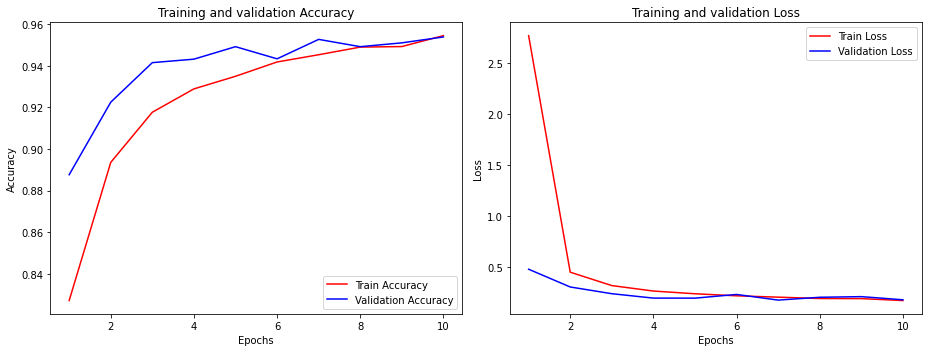

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1,len(acc)+1)

fig, axs = plt.subplots(1,2,figsize=(13,5))
axs[0].plot(epochs,acc,"r",label="Train Accuracy")
axs[0].plot(epochs,val_acc,"b",label="Validation Accuracy")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].set_title('Training and validation Accuracy')
axs[0].legend()
axs[1].plot(epochs,loss,"r",label="Train Loss")
axs[1].plot(epochs,val_loss,"b",label="Validation Loss")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].set_title('Training and validation Loss')
axs[1].legend()
plt.tight_layout()

Using differents optimizers such as SGD it was obtained acc=0.13, with RMSprop it was obtained acc=0.95 but the loss function increased instead of decreasing, Adadelta acc=0.17 and, Adamax and Nadam yield good results but not better than Adam that was selected.

The Adam optimizer yield good results, the loss function decrease while the epochs increase and the accuracy increase while the epochs increase, the limit for epochs was 10.

# Now we do the predictions and print the metrics Confusion matrix and clasification report.

The Accuracy Score for Test set is: 0.9498 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.92      0.96      0.94      1010
           4       0.97      0.93      0.95       982
           5       0.97      0.91      0.94       892
           6       0.98      0.95      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.87      0.94      0.90       974
           9       0.92      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000




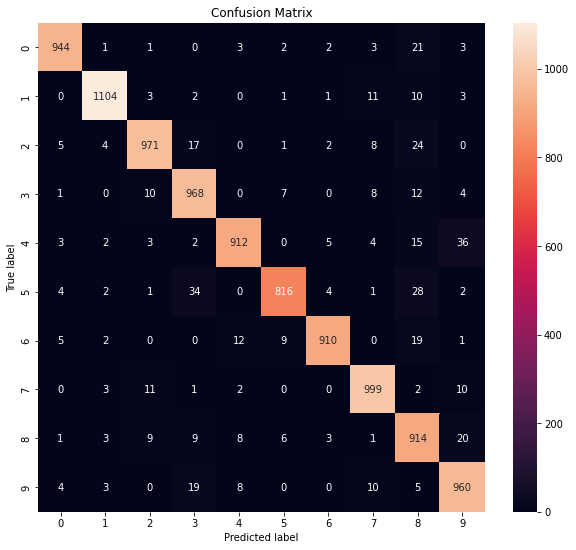

In [12]:
# Predicciones 
# ==============================================================================
ypred = model.predict(X_test)
y_pred=np.argmax(ypred,axis=1) #axis=0 search the argument max by column
                               #axis=1 search the argument max by row

#Metric R2
#===============================================================================
print("The Accuracy Score for Test set is: {:.4} \n".format(accuracy))

# Reporte de métricas de la clasificación
# ==============================================================================
print(classification_report(y_test, y_pred))

#Confusion Matrix
#===============================================================================
print("")
fig, ax = plt.subplots(figsize=(10, 9))
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Confusion Matrix")
plt.show()

Taking into account the confusion matrix, we can to see that there is a little quantity of digits outside of diagonal, that it is good because it means that few digits was bad predicted.


# Finally we show ten random samples with your respective true value and predicted value.

In [13]:
#choose 10 randomly cars

random=np.random.randint(len(y_test), size=10)
random_True=[]
random_pred=[]
for i in random:
  random_True.append(y_test[i])
  random_pred.append(y_pred[i])

dict={"Digit True":random_True, "Digit Predict":random_pred}

print(tabulate(dict, headers='keys', tablefmt='fancy_grid')) 

╒══════════════╤═════════════════╕
│   Digit True │   Digit Predict │
╞══════════════╪═════════════════╡
│            7 │               7 │
├──────────────┼─────────────────┤
│            7 │               7 │
├──────────────┼─────────────────┤
│            3 │               3 │
├──────────────┼─────────────────┤
│            3 │               3 │
├──────────────┼─────────────────┤
│            3 │               3 │
├──────────────┼─────────────────┤
│            5 │               5 │
├──────────────┼─────────────────┤
│            8 │               8 │
├──────────────┼─────────────────┤
│            4 │               4 │
├──────────────┼─────────────────┤
│            6 │               6 │
├──────────────┼─────────────────┤
│            4 │               4 │
╘══════════════╧═════════════════╛


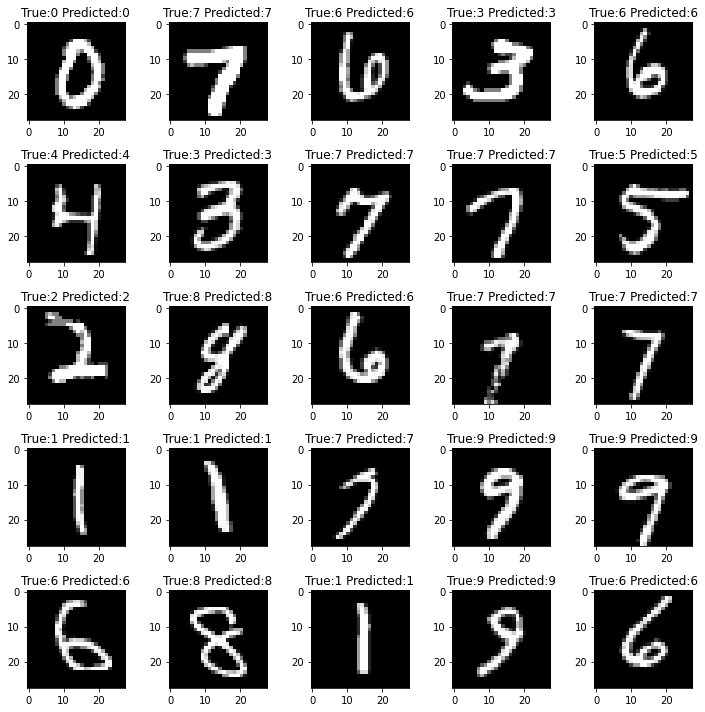

In [15]:
fig, axs = plt.subplots(5, 5,figsize=(10, 10))

for i in range(5):
  for j in range(5):
    random = np.random.randint(len(y_test)) #random integer number generation
    row_pixels=X_test[random] #pixels of the image 
    axs[i, j].imshow(row_pixels.reshape(28,28),cmap = "gray") #plot the digit randomly
    axs[i, j].set_title('True:{0:1d} Predicted:{0:1d}'.format(y_test[random],y_pred[random]))#title of plot
plt.tight_layout() #method that tunning parameters of image

### We find that Neural Networks classifier works better than Logistic Regression classifier in this case. In this workshop we find an accuracy of $94.98$% in the prediction of digits wrote to hand (Images of 28x28 pixels) for the MNIST data set.